In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cc = pd.read_csv('/content/State Transaction subset.csv')

In [3]:
cc

,Unnamed: 0.1,Unnamed: 0,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,0,21608,2019,2,DEPT OF CORRECTIONS,Food Services,TODD DEVIN FOOD,Industrial Supplies Not Elsewhere Classified,08/20/2018,10300.00
1,1,21609,2019,2,DEPT OF CORRECTIONS,Food Services,EMR,Miscellaneous Repair Shops And Related Services,08/06/2018,2.82
2,2,21610,2019,2,DEPT OF CORRECTIONS,Food Services,EMR,Miscellaneous Repair Shops And Related Services,08/06/2018,12.48
3,3,21611,2019,2,DEPT OF CORRECTIONS,Food Services,CAN*CANONFINANCIAL CFS,Electronic Sales,08/08/2018,149.30
4,4,21612,2019,2,DEPT OF CORRECTIONS,Food Services,GRAINGER,Industrial Supplies Not Elsewhere Classified,08/22/2018,226.56
...,...,...,...,...,...,...,...,...,...,...
5995,5995,27932,2019,2,DEPT OF TRANSPORTATION,Traffic,STAPLES DIRECT,Stationery-Office Supplies-Printing Writing Pap,08/04/2018,250.31
5996,5996,27933,2019,2,DEPT OF TRANSPORTATION,Traffic,IHS GLOBAL INC.,Miscellaneous Publishing And Printing,07/27/2018,431.00
5997,5997,27934,2019,2,DEPT OF TRANSPORTATION,Traffic,NSC*NORTHERN SAFETY CO,Direct Marketing-Other Direct Marketers-Not Elsew,07/28/2018,203.85
5998,5998,27935,2019,2,DEPT OF TRANSPORTATION,Traffic,FASTENAL COMPANY01,Hardware Stores,07/27/2018,70.10


In [7]:
"""n = cc['Unnamed: 0'].count()
for i in range(0,6000):
  wl = len(cc['DEPT_NAME'][i])
  cc['DEPT_NAME'][i] =  'D' + cc['DEPT_NAME'][i][1:wl].lower()"""

"n = cc['Unnamed: 0'].count()\nfor i in range(0,6000):\n  wl = len(cc['DEPT_NAME'][i])\n  cc['DEPT_NAME'][i] =  'D' + cc['DEPT_NAME'][i][1:wl].lower()"

In [6]:
#cc

<ipython-input-8-c1e198324ef6>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=cc.index,y=cc['MERCHANDISE_AMT'],palette='coolwarm')


<Axes: xlabel='None', ylabel='MERCHANDISE_AMT'>

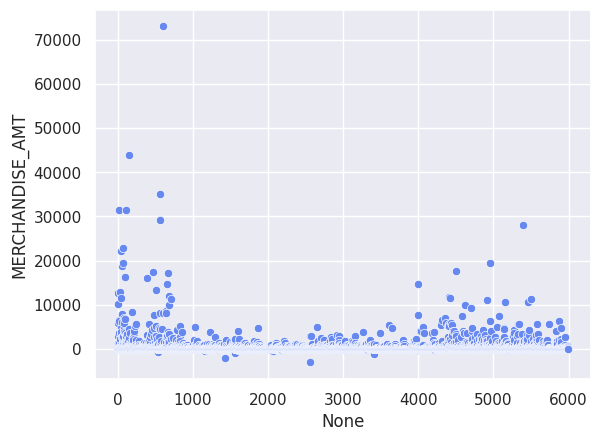

In [8]:
sns.set_theme(style='darkgrid',palette='coolwarm')
sns.scatterplot(x=cc.index,y=cc['MERCHANDISE_AMT'],palette='coolwarm')

Z-Score

*  z = (x - mean)/std

In [9]:
cc['Z_score'] = (cc['MERCHANDISE_AMT'] - cc['MERCHANDISE_AMT'].mean())/cc['MERCHANDISE_AMT'].std()

In [10]:
cc['IS_Anomaly'] = (cc['Z_score'].abs() >= 3).astype(int)

In [11]:
cc.describe()

,Unnamed: 0.1,Unnamed: 0,FISCAL_YEAR,FISCAL_PERIOD,MERCHANDISE_AMT,Z_score,IS_Anomaly
count,6000.000000,6000.000000,6000.0,6000.0,6000.000000,6.000000e+03,6000.000000
mean,2999.500000,24714.656333,2019.0,2.0,396.836675,3.552714e-17,0.009167
std,1732.195139,1804.440254,0.0,0.0,1878.698758,1.000000e+00,0.095311
min,0.000000,21608.000000,2019.0,2.0,-3035.420000,-1.826933e+00,0.000000
25%,1499.750000,23145.750000,2019.0,2.0,16.860000,-2.022552e-01,0.000000
50%,2999.500000,24720.500000,2019.0,2.0,57.420000,-1.806658e-01,0.000000
75%,4499.250000,26278.250000,2019.0,2.0,229.655000,-8.898802e-02,0.000000
max,5999.000000,27936.000000,2019.0,2.0,72978.450000,3.863398e+01,1.000000


<Axes: xlabel='Avg Merch. Amt.', ylabel='DEPT_NAME'>

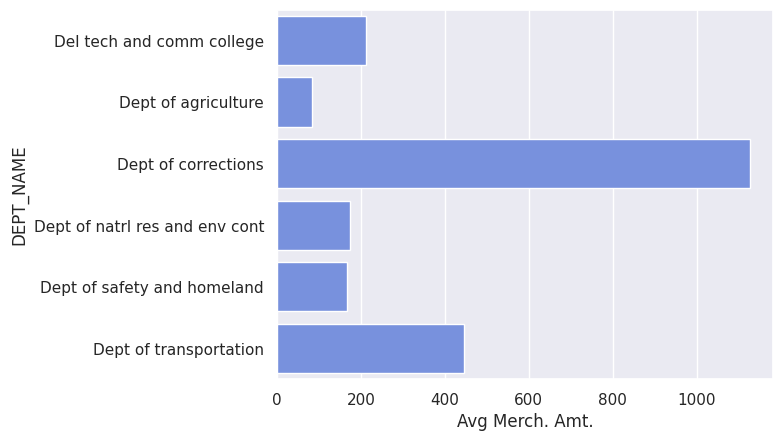

In [12]:
dept_wise_amt = cc.groupby('DEPT_NAME')['MERCHANDISE_AMT'].mean().reset_index(name='Avg Merch. Amt.')
sns.barplot(x='Avg Merch. Amt.',y='DEPT_NAME',data=dept_wise_amt)

In [13]:
date_merch = cc.groupby('TRANS_DT')['MERCHANDISE_AMT'].mean()
date_merch.sort_values(ascending=False)

,MERCHANDISE_AMT
TRANS_DT,
08/17/2018,879.582125
08/10/2018,756.210488
07/30/2018,663.710045
07/31/2018,654.526897
07/27/2018,565.735928
08/21/2018,503.518202
08/20/2018,493.422429
08/08/2018,464.024673
08/07/2018,427.326741


In [14]:
nanom = cc.loc[cc['IS_Anomaly']==1,'DEPT_NAME'].count()
print("Total anomalies:",nanom)

Total anomalies: 55


<Axes: xlabel='Count', ylabel='DEPT_NAME'>

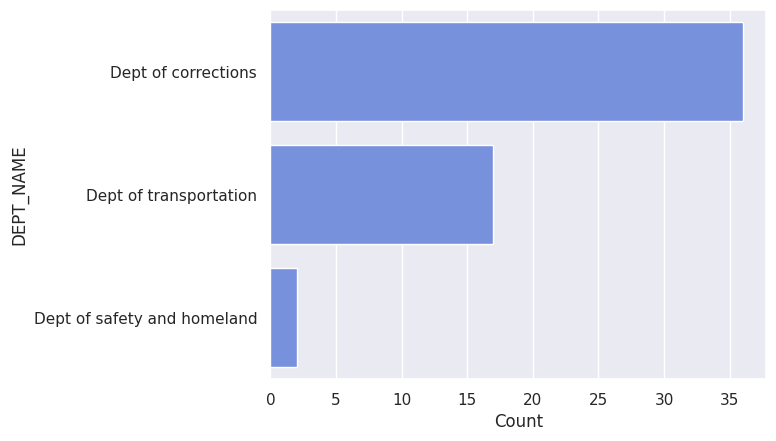

In [15]:
deptWanom = cc.loc[cc['IS_Anomaly']==1,'DEPT_NAME'].value_counts().reset_index(name='Count')
sns.barplot(x='Count',y='DEPT_NAME',data=deptWanom)

**Merchants by Department over anomalies**


SELECT Dept_Name, Merchant FROM CC


WHERE IS_Anomaly = 1


GROUP BY Dept_Name;

In [16]:
cc_anom = cc.loc[cc['IS_Anomaly']==1,['DEPT_NAME','MERCHANT','MERCHANDISE_AMT']]

In [17]:
cc_anom

,DEPT_NAME,MERCHANT,MERCHANDISE_AMT
0,Dept of corrections,TODD DEVIN FOOD,10300.00
6,Dept of corrections,VERITIV,12745.60
9,Dept of corrections,H. SCHRIER And CO. INC.,10224.48
20,Dept of corrections,KARETAS FOODS,6486.59
21,Dept of corrections,KARETAS FOODS,6292.80
22,Dept of corrections,KARETAS FOODS,31386.65
35,Dept of corrections,H. SCHRIER And CO. INC.,12988.80
46,Dept of corrections,ACME PAPER AND SUPPLY,11491.52
48,Dept of corrections,THE CLASS PRODUCE GROUP,22163.20
61,Dept of corrections,KARETAS FOODS,18816.00


<Axes: xlabel='MERCHANDISE_AMT', ylabel='MERCHANT'>

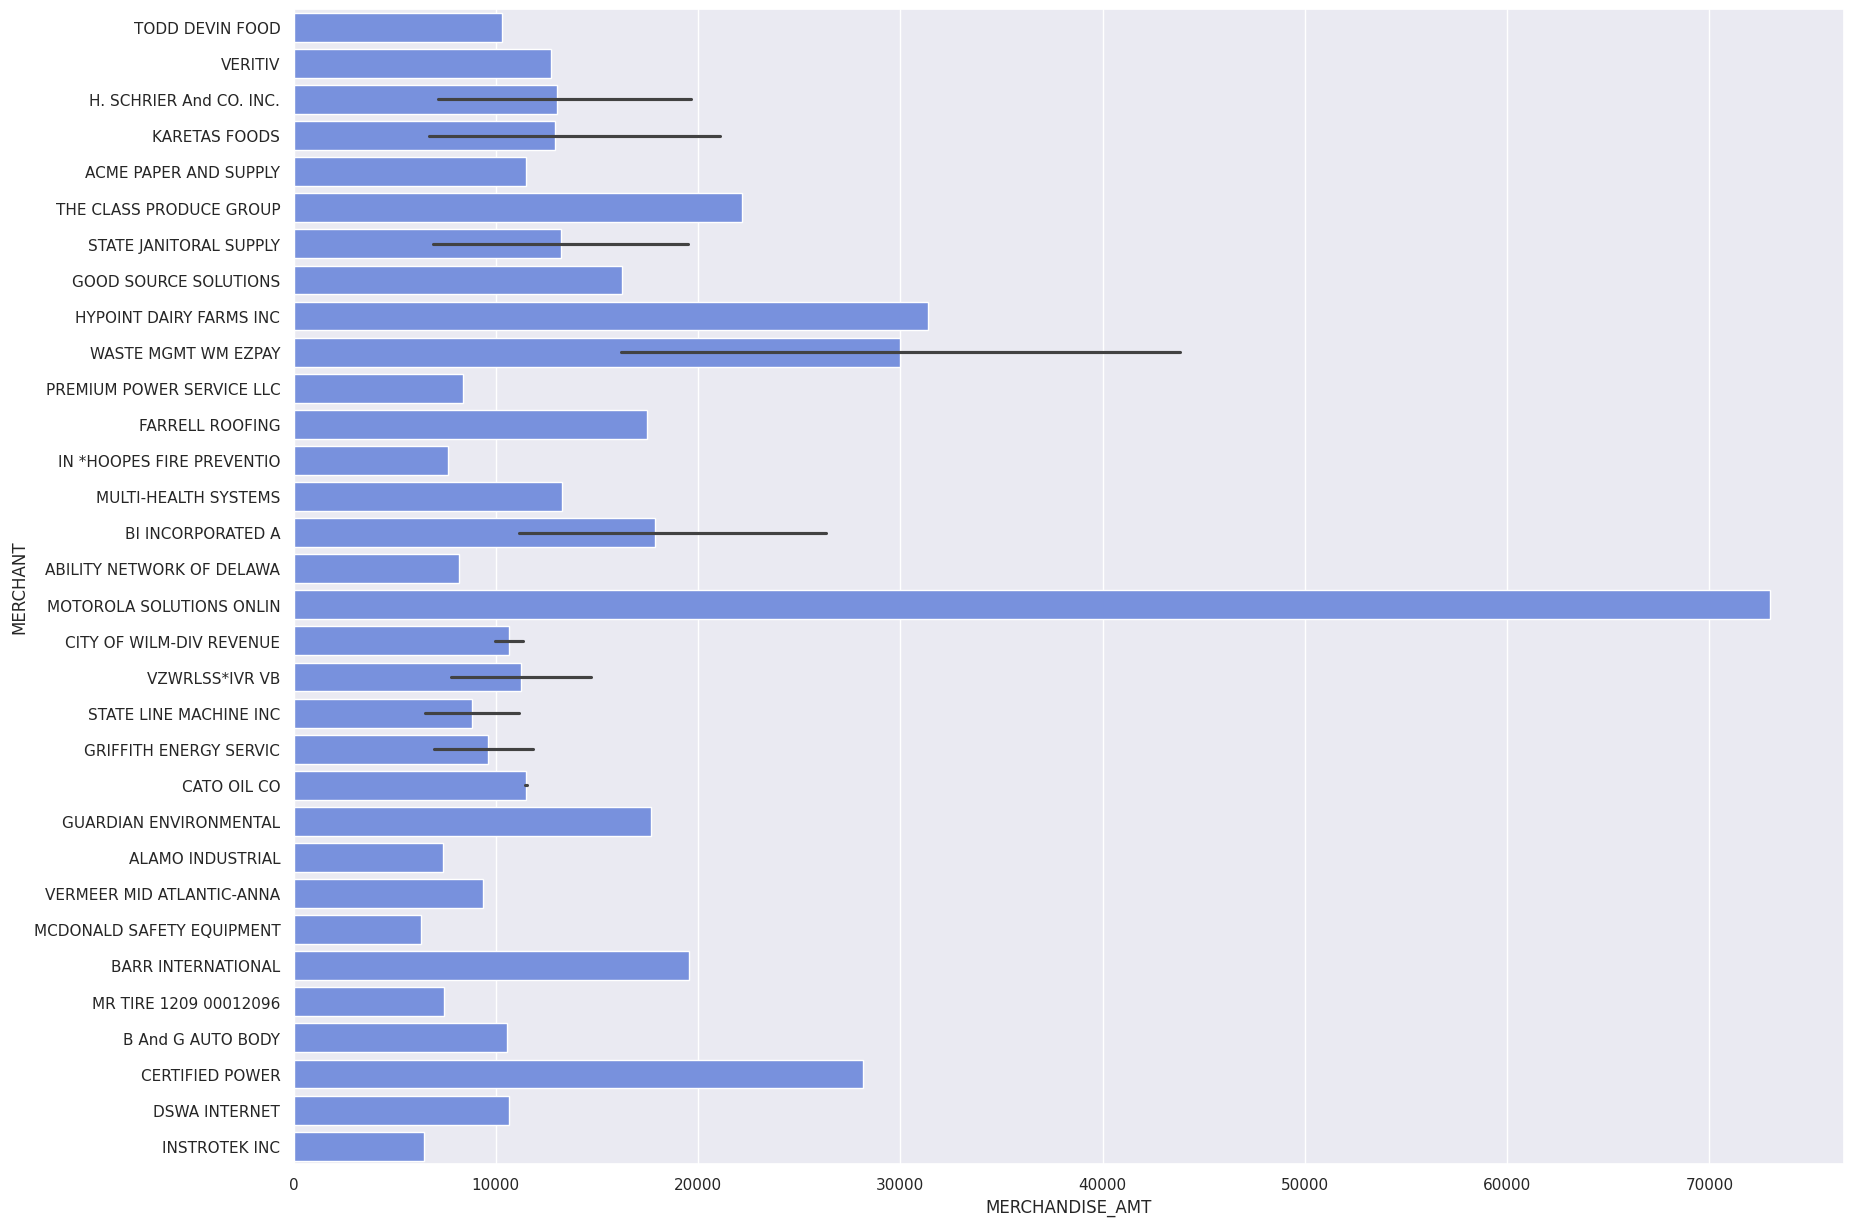

In [18]:
plt.figure(figsize=(20,15))
sns.barplot(x='MERCHANDISE_AMT',y='MERCHANT',data=cc_anom)

**Decision Tree Classifier**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
X = cc[['MERCHANT','MERCHANDISE_AMT']]
y = cc['IS_Anomaly']

In [21]:
le = LabelEncoder()
X['MERCHANT'] = le.fit_transform(X['MERCHANT'])

<ipython-input-21-1bd1ed47bfdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MERCHANT'] = le.fit_transform(X['MERCHANT'])


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9991666666666666
Precision: 1.0
Recall: 0.9333333333333333
